# Classification Models

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## Knn Model
- no train step
- in fit step, it tries to find some tricks to speed up this search, for example, scikit-learn can construct kd-trees or ball trees during the call to the fit() function.

In [31]:
iris = load_iris()

In [32]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
X, y = iris.data, iris.target

In [36]:
X.shape, y.shape

((150, 4), (150,))

In [37]:
iris.data[:5], iris.feature_names, iris.target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [38]:
X.shape

(150, 4)

In [5]:
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

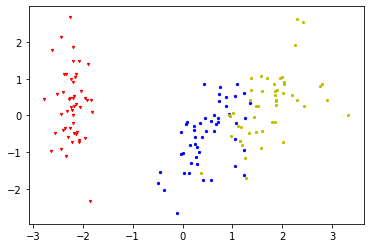

In [39]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
pca_result = pca.fit_transform(StandardScaler().fit_transform(X))

m = ['v', 'o', 'x']
c = ['r','b','y']
plt.figure(figsize=(6,4))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [40]:
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = SGDClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print("kNN score: {:.2f}".format(knn.score(X_test, y_test)))
clf.fit(X_train, y_train)
print("Linear Reg score: {:.2f}".format(clf.score(X_test, y_test)))

kNN score: 0.98
Linear Reg score: 0.80


In [41]:
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    print("K가", k, "일때 정확도: {:.2f}".format(knn.score(X_test, y_test)))

K가 1 일때 정확도: 0.98
K가 2 일때 정확도: 0.96
K가 3 일때 정확도: 0.98
K가 4 일때 정확도: 0.96
K가 5 일때 정확도: 0.96
K가 6 일때 정확도: 0.93
K가 7 일때 정확도: 0.93
K가 8 일때 정확도: 0.93
K가 9 일때 정확도: 0.93


## 교차 검증

In [44]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(knn, X, y, cv=5).mean().round(3)

0.973

In [45]:
cross_val_score(clf, X, y, cv=5).mean().round(4)

0.7133

## 분석
- 선형 알고리즘이 성능이 더 좋지 않은 것으로 나타난다. (하지만 데이터 사이즈가 작아 불확실)
- scaling 한 후에 다시 한 번 확인해 보자 
- 선형 모델이나 SVM, 신경망에서는 반드시 scaling 을 해야 한다.

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
print("Linear-sacaled: ", cross_val_score(clf, X_sc, y, cv=5).mean().round(4))
print("Knn-scaled: ", cross_val_score(knn, X_sc, y, cv=5).mean().round(4))

Linear-sacaled:  0.9533
Knn-scaled:  0.96


In [12]:
X.shape

(150, 4)

## Decision tree model

In [50]:
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, :2]   # use only two features
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[0] <= 5.45\ngini = 0.66\nsamples = 105\nvalue = [35, 41, 29]'),
 Text(83.7, 108.72, 'X[1] <= 2.8\ngini = 0.234\nsamples = 37\nvalue = [32, 5, 0]'),
 Text(41.85, 36.23999999999998, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.061\nsamples = 32\nvalue = [31, 1, 0]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 6.25\ngini = 0.536\nsamples = 68\nvalue = [3, 36, 29]'),
 Text(209.25, 36.23999999999998, 'gini = 0.478\nsamples = 37\nvalue = [3, 25, 9]'),
 Text(292.95, 36.23999999999998, 'gini = 0.458\nsamples = 31\nvalue = [0, 11, 20]')]

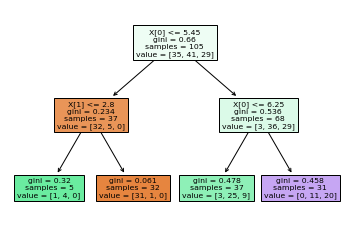

In [51]:
from sklearn import tree
tree.plot_tree(clf, filled=True) # filled=True -> paint to indicate majority class

- use Graphviz

In [15]:
# !pip install graphviz   or
# conda install python-graphviz (in cmd 창)
# note that the above two commands install graphviz library in different places.

- export_graphviz(): Export a decision tree in DOT format. This function generates a GraphViz representation of the decision tree, which is then written into out_file
- dot file: DOT is a graph description language. DOT graphs are typically files with the filename extension gv or dot.

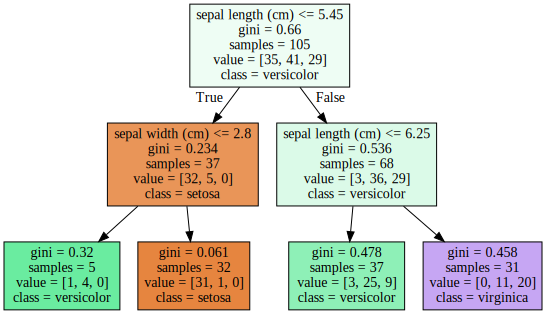

In [52]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    clf,
    out_file = "./iris.dot",
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names,
    filled = True
    )

with open("./iris.dot") as f:
    dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

- let's see decision boundary

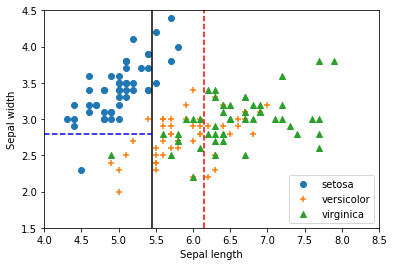

In [53]:
plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '-k') # 검정색 실선

xx = np.linspace(4, 5.45, 3)
yy = np.linspace(2.8, 2.8, 3)
plt.plot(xx, yy, '--b') # 파란색 점선

xx = np.linspace(6.15, 6.15, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '--r') # 붉은색 점선

In [67]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8444444444444444


- use all features

In [68]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9333333333333333

In [69]:
# 결정트리를 만드는데 기여한 정도: feature_importances_
list(zip(iris.feature_names, clf.feature_importances_.round(4)))

[('sepal length (cm)', 0.0),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.5451),
 ('petal width (cm)', 0.4549)]

In [70]:
pd.DataFrame({'feature':iris.feature_names,'importance':clf.feature_importances_ })

,feature,importance
0,sepal length (cm),0.00000
1,sepal width (cm),0.00000
2,petal length (cm),0.54512
3,petal width (cm),0.45488


## RandomForest model (ensemble model)

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

In [72]:
cancer = load_breast_cancer()
# np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
print(clf.score(X_test, y_test))

0.9370629370629371


In [74]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [75]:
cancer.data.shape

(569, 30)

In [77]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })
df=df.sort_values('importance', ascending=False)
print(df.head(10))

                    feature  importance
20             worst radius    0.703388
27     worst concave points    0.111692
1              mean texture    0.095060
23               worst area    0.021831
15        compactness error    0.015609
13               area error    0.012987
24         worst smoothness    0.009960
19  fractal dimension error    0.009731
26          worst concavity    0.008362
3                 mean area    0.005017


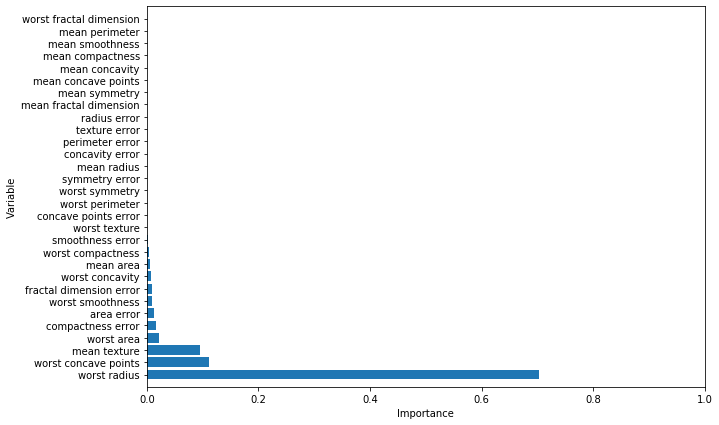

In [78]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

0.9790209790209791


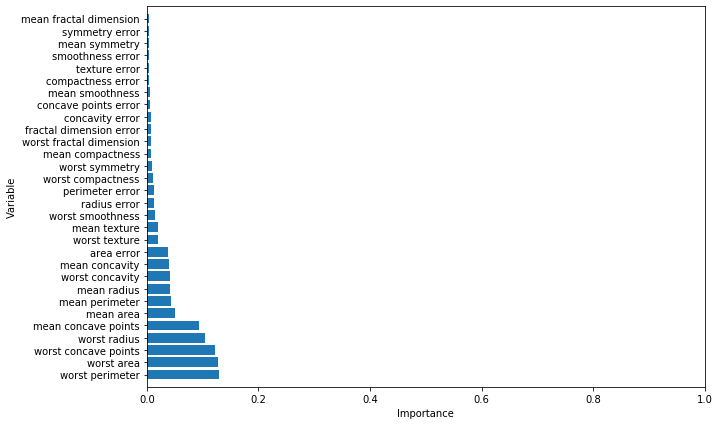

In [79]:
# 랜덤 포레스트를 사용한 경우의 중요 특성

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

df = pd.DataFrame({'feature':cancer.feature_names,'importance':rfc.feature_importances_ })
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

## Logistic Regression Classifier
## SVM Classifier